 <h1><center><font color ='Red'>Machine Learning, Major Project on Image Classification</font></center></h1>

<h3> <center> <font color ='Navy'> Name: Suhash Reddy Immareddy </font> </center> </h3>
<h3> <center> <font color ='Navy'>Student Id: 45693242 </font> </center> </h3>
<h3> <center> <font color ='Navy'>Sub code: Comp8220 </font> </center> </h3>

# ---------------------------------------------------------------------------------------------------------------

<h4> <font color ='Brown'> About the Dataset: </font> </h4>
I will be using CelebA Dataset (which is widely used dataset that contains Celebrity faces) in this entire project to train the conventional Machine Learning Models as well as deep learning models inorder to predict the hair colour (Brown, Black, Blond, Gray) of the celebrity.
     
<h4> <font color ='Brown'> Project FLow: </font> </h4>
This Jupyter Notebook is Divided into 9 Sections as shown below:

    1. Best Conventional Machine Learning Model and its Description.
    2. Interpreting the Results of Selected model and about the selected Hyper parameters choosen.
    3. Additional Conventional Machine Learning Model.
    4. Interpreting the Results of Additional model and about the selected Hyper parameters choosen.
    5. Best Deep Learning Model and Additional Deep Learning as well allong with model Description.
    6. Interpreting the Results For Both Selected Deep Learning and Additional Deep learning model and about the selected Hyper parameters choosen.   
    7. Comparing the Performance of Best Model From CNN with Best Model From Conventional.
    
<h4> <font color ='Brown'> Models Used: </font> </h4>
The Following are the Models used in this jupyter notebook:

    1. Support Vector Machine Classifier.
    2. Random Forest Classifier.
    3. CNN.
    4. Transfer Learning with VGG19.
    
<h4> <font color ='Brown'> Environment: </font> </h4>
All the work presented in this jupyter notebook is done in a local system with the following specifications:
    
    1. Intel 9th gen Core i7 (6 cores) processor.
    2. 16gb Ram.
    3. NVDIA Geforce GTX 1650 (Cuda Compatable) with 4gb dedicated Memory (Since I am running CNN models on my GPU it is not possible to get reproducable results everytime due to the randomness involved in the GPU.

Tools used:
    
    1. Anaconda with a Pyhton Interpreter having tensforflows gpu installed
    2. Jupyter notebook using the Conda Interpreter with GPU access.

<h4> <font color ='Brown'> References: </font> </h4>
Some of the Code in this notebook is from the Text book and some Websites, the following are the links to the sites 

1.https://drive.google.com/open?id=111581z90y4bosiHKzAwTn5h7W7sOvc4B

2.https://drive.google.com/open?id=11-RNZcJJc9deY9CquFss82W17N-if5IB

3.https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb#scrollTo=8OGRcLNwYoZu 

4.https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2

5.https://machinelearningmastery.com/reproducible-results-neural-networks-keras/ 

 <h2><center><font color ='Red'>Section-1: SVM (Conventional Model)</font></center></h2>

<h3><font color ='coral'>1) Preprocessing and Feature Extraction :</font></h3>

<h4><font color ='purple'>Importing all the Necessary Packages:</font></h4>

In [1]:
%matplotlib inline

import os
import keras
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from os.path import join
from sklearn.svm import SVC
from tensorflow import keras
from keras.models import Model
from keras import backend as BD
#from google.collab import drive
#drive.mount('/content/drive')
from keras.regularizers import l2
from scipy.stats import reciprocal
from keras.models import load_model
from keras.models import Sequential
from matplotlib.pyplot import imshow
from keras.applications import VGG16
from keras.applications import VGG19
from keras.preprocessing import image
from keras.applications import MobileNetV2
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPooling2D
from sklearn.ensemble import RandomForestClassifier
from keras_applications.resnet_v2 import ResNet50V2
from sklearn.model_selection import RandomizedSearchCV
from keras_applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

<h4><font color ='purple'>Loading the Training Data set and Normalizing: Traning Data Shape is (98479, 48, 48, 3)</font></h4>

In [2]:
# preliminary data Exploration 
hair_colours = ['black', 'blond', 'brown', 'gray']

# If running on Google collab RUn the code present in this comment
# dataset_directory = '/content/drive/My Drive/Colab Notebooks/project_datasets/image_dataset'

dataset_directory = 'C:\\Users\\suhas\\Downloads\\ML Practice\\image_dataset'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

image_size = 48
images_train_rs = images_train.reshape([-1, image_size, image_size, 3]) / 255.0 # Rescaling the Data such that the values lie in range between 0 and 1

In [3]:
Features = images_train_rs.shape[1]*images_train_rs.shape[2]*images_train_rs.shape[3]
Features

6912

<h4><font color ='purple'>Reshaping Normalizes Training Data: Reshaped Traning Data Shape is (98479, 6912)</font></h4>

In [4]:
lst1 = [None] * images_train_rs.shape[0] # creating an empty array of size 98479
for i in range(images_train_rs.shape[0]):
    lst1[i] = images_train_rs[i].reshape([-1]) # reshaping each picture to 6912 features and storing it in lst1
#print(lst)
x = np.array(lst1).reshape(images_train_rs.shape[0],Features) # converting the list to an array
print(x.shape)

(98479, 6912)


<h4><font color ='purple'>Converting the Reshaped Training data into a data frame with target lables at the end:</font></h4> 
    This step is necessary when we want to run the SVM model on the data. Since, it would take more time for SVM to train on 1 lakh images, this step would help in selecting a sample from the whole data and then we use this sample data to train the model on. 

In [5]:
tain1df = pd.DataFrame(x) # Converting Train Lables array into Data Frame

In [6]:
tain1df

,0,1,2,3,4,5,6,7,8,9,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,0.992157,0.905882,0.760784,0.992157,0.905882,0.760784,0.992157,0.905882,0.760784,0.992157,...,0.086275,0.478431,0.203922,0.090196,0.450980,0.184314,0.074510,0.431373,0.168627,0.062745
1,0.258824,0.200000,0.172549,0.266667,0.203922,0.172549,0.329412,0.258824,0.227451,0.411765,...,0.168627,0.388235,0.192157,0.141176,0.474510,0.305882,0.278431,0.541176,0.435294,0.419608
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.086275,0.192157,0.129412,0.078431,0.250980,0.211765,0.117647,0.294118,0.247059,0.160784
3,0.470588,0.286275,0.243137,0.486275,0.286275,0.247059,0.486275,0.294118,0.250980,0.447059,...,0.611765,0.647059,0.643137,0.662745,0.643137,0.639216,0.658824,0.635294,0.631373,0.650980
4,0.105882,0.105882,0.129412,0.125490,0.109804,0.129412,0.074510,0.074510,0.078431,0.490196,...,0.117647,0.105882,0.101961,0.121569,0.101961,0.098039,0.117647,0.098039,0.094118,0.113725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98474,0.815686,0.843137,0.843137,0.772549,0.768627,0.780392,0.780392,0.756863,0.776471,0.835294,...,0.015686,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451
98475,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,...,0.062745,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745
98476,0.705882,0.635294,0.576471,0.709804,0.639216,0.588235,0.705882,0.635294,0.588235,0.701961,...,0.023529,0.019608,0.019608,0.011765,0.031373,0.031373,0.023529,0.035294,0.035294,0.027451
98477,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,...,0.121569,0.098039,0.125490,0.125490,0.105882,0.121569,0.125490,0.109804,0.125490,0.129412


In [8]:
tain2df = pd.DataFrame(labels_train) # gettin train labels into a dataframe
tain2df

,0
0,2
1,2
2,2
3,0
4,0
...,...
98474,3
98475,2
98476,2
98477,0


In [18]:
# merging the train images and labels together to a single frame
train_wholedata = tain1df.merge(tain2df, left_index=True, right_index=True)
train_wholedata.tail()

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
98474,0.815686,0.843137,0.843137,0.772549,0.768627,0.780392,0.780392,0.756863,0.776471,0.835294,...,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,3
98475,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,...,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745,2
98476,0.705882,0.635294,0.576471,0.709804,0.639216,0.588235,0.705882,0.635294,0.588235,0.701961,...,0.019608,0.019608,0.011765,0.031373,0.031373,0.023529,0.035294,0.035294,0.027451,2
98477,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,...,0.098039,0.125490,0.125490,0.105882,0.121569,0.125490,0.109804,0.125490,0.129412,0
98478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.976471,0.435294,0.494118,0.976471,0.435294,0.494118,0.976471,0.435294,0.494118,0


In [22]:
train_wholedata.shape # merged data frame shape

(98479, 6913)

<h4><font color ='purple'>Loading the Validation DataSet and Normalizing: Validation Dataset Shape (12270, 48, 48, 3)</font></h4>

In [23]:
images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))
images_val_rs = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
Features1 = images_val_rs.shape[1]*images_val_rs.shape[2]*images_val_rs.shape[3]
Features1   # calculating the no of features for each picture

6912

<h4><font color ='purple'>Reshaping the Normalized Validation DataSet: Validation Dataset Shape (12270, 6912)</font></h4>

In [24]:
lst3 = [None] * images_val_rs.shape[0] # creating an empty array of size 12270
for i in range(images_val_rs.shape[0]):
    lst3[i] = images_val_rs[i].reshape([-1]) # reshaping each picture to 6912 features and storing it in lst3
#print(lst)
y = np.array(lst3).reshape(images_val_rs.shape[0],Features1) # converting the list to an array
print(y.shape)

(12270, 6912)


<h4><font color ='purple'>Converting the Reshaped Validation data into a data frame with target lables at the end:</font></h4> 
    This step is necessary when we want to run the SVM model on the data. Since, it would take more time for SVM to validate on 12k images, this step would help in selecting a sample from the whole data and then we use this sample data to validate the model.

In [25]:
tain3df = pd.DataFrame(y) # converting the valdation images data to a dataframe

In [26]:
tain4df = pd.DataFrame(labels_val) # converting lables of validation data to a dataframe

In [29]:
Val_wholedata = tain3df.merge(tain4df, left_index=True, right_index=True)
Val_wholedata.head() # merging validation lables and images into a single dataframe

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
0,0.925490,0.941176,0.952941,0.941176,0.956863,0.968627,0.976471,0.988235,1.000000,0.960784,...,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.098039,0.098039,0.098039,0
1,0.384314,0.345098,0.317647,0.231373,0.160784,0.133333,0.270588,0.172549,0.152941,0.274510,...,0.349020,0.250980,0.203922,0.349020,0.262745,0.211765,0.341176,0.258824,0.215686,2
2,0.000000,0.007843,0.003922,0.000000,0.007843,0.003922,0.000000,0.007843,0.003922,0.000000,...,0.239216,0.368627,0.454902,0.219608,0.458824,0.576471,0.211765,0.478431,0.627451,2
3,0.584314,0.372549,0.415686,0.356863,0.239216,0.470588,0.309804,0.258824,0.549020,0.329412,...,0.811765,0.384314,0.474510,0.811765,0.380392,0.482353,0.807843,0.384314,0.482353,0
4,0.760784,0.788235,0.890196,0.760784,0.788235,0.890196,0.752941,0.780392,0.882353,0.752941,...,0.623529,0.643137,0.721569,0.639216,0.658824,0.737255,0.643137,0.662745,0.741176,0


<h4><font color ='purple'>Selecting the SubSample from Training and Validation DataSets</font></h4> 
    SVM is Costly (in terms of time consuming) to perform calculations on a large dataset like celeba. So, what I had done is I randomly selected a sample of size 19991 from training dataset for training the model and 2008 from validation dataset for validating the model. As I am not using Startified sampling you might get a doubt on bias included in terms of propotion of data of each class available in the Training and Validation Datasets. Since, the Dataset size is huge and the sample drawn from this population is also large enough such that we can assume that the data drawn from the population follows a normal distribution. 
    After looking at the results section we can say that the assumption did hold as the modle performed well on training, validation, test data (Kaggle Public Data).  


In [31]:
Train_sub_sample = train_wholedata.sample(frac=0.203) # selecting 20 percent of the data

In [32]:
Train_sub_sample.head()

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
35088,0.639216,0.764706,0.815686,0.647059,0.772549,0.823529,0.647059,0.772549,0.823529,0.647059,...,0.435294,0.509804,0.537255,0.431373,0.494118,0.533333,0.380392,0.431373,0.474510,2
197,0.552941,0.537255,0.290196,0.552941,0.537255,0.286275,0.545098,0.533333,0.274510,0.541176,...,0.227451,0.227451,0.227451,0.231373,0.231373,0.231373,0.227451,0.227451,0.227451,3
54028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.898039,0.674510,0.525490,0.901961,0.678431,0.525490,0.898039,0.674510,0.521569,2
74301,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,...,0.243137,0.239216,0.231373,0.149020,0.145098,0.137255,0.164706,0.160784,0.152941,0
79617,0.486275,0.486275,0.486275,0.490196,0.490196,0.490196,0.486275,0.486275,0.486275,0.466667,...,0.188235,0.188235,0.180392,0.172549,0.172549,0.164706,0.168627,0.168627,0.160784,0


In [36]:
Train_sub_sample.shape

(19991, 6913)

In [33]:
Val_sub_sample = Val_wholedata.sample(frac=0.171) # selecting 17% of the data as validation sample

In [34]:
Val_sub_sample.head()

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
6494,0.152941,0.152941,0.121569,0.152941,0.152941,0.121569,0.152941,0.152941,0.121569,0.160784,...,0.160784,0.176471,0.188235,0.152941,0.164706,0.176471,0.156863,0.172549,0.180392,3
5653,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.752941,0.027451,0.074510,0.662745,0.011765,0.031373,0.603922,0.047059,0.098039,0
716,0.015686,0.035294,0.019608,0.015686,0.035294,0.019608,0.011765,0.031373,0.015686,0.015686,...,0.615686,0.631373,0.635294,0.584314,0.600000,0.603922,0.639216,0.654902,0.654902,0
5215,0.019608,0.054902,0.011765,0.011765,0.035294,0.023529,0.019608,0.027451,0.035294,0.015686,...,0.921569,0.823529,0.776471,0.949020,0.866667,0.815686,0.996078,0.917647,0.874510,2
10916,0.839216,0.819608,0.807843,0.839216,0.823529,0.811765,0.850980,0.850980,0.831373,0.858824,...,0.101961,0.062745,0.054902,0.105882,0.066667,0.058824,0.121569,0.082353,0.066667,0


<h4><font color ='purple'>Preparing the data ready for the model to fit on:</font></h4> 

In [35]:
# Training Sub sample 
Train_Sub_x = Train_sub_sample.drop(['0_y'], axis =1)
Train_Sub_y = Train_sub_sample['0_y']
print(Train_Sub_x.shape)
print(Train_Sub_y.shape)

(19991, 6912)
(19991,)


In [37]:
# validation sub sample
Val_Sub_x = Val_sub_sample.drop(['0_y'], axis =1)
Val_Sub_y = Val_sub_sample['0_y']
print(Val_Sub_x.shape)
print(Val_Sub_y.shape)

(2098, 6912)
(2098,)


<h3><font color ='coral'>2) Model Fitting :</font></h3>
    SVM Model is fitted on the Training sub sample of size and shape (19991, 6912) and is validated on the validation sub sample of size and shape (2098, 6912). At first we first fit the model with default parameters and compare this result with later model with best parameters. 
    
    1. Model 1: SVM with default Parameters.
    2. Model 2: SVM with Hyper parameter to select the best paramters
    3. Model 3: Selected SVM with Best Parameters.

<h3><font color ='brown'>Model 1: SVM with default parameters</font></h3>

In [38]:
model = SVC(gamma='auto')
model = model.fit(Train_Sub_x, Train_Sub_y)
# 30 min

In [39]:
Train_pred = model.predict(Train_Sub_x)
print("Accuracy score for Train is:",accuracy_score(Train_Sub_y, Train_pred))
Val_pred = model.predict(Val_Sub_x)
print("Accuracy score for validation is:",accuracy_score(Val_Sub_y, Val_pred))

Accuracy score for Train is: 0.7804512030413686
Accuracy score for validation is: 0.7569113441372736


<h4><font color ='purple'>Results Interpretation for SVM with default parameters:</font></h4>
1. we can see that the accuracy scores of traing and validation data is looking good, but the model seems to overfit the data a bit.
2. As the model seems promising we now try to change the Parametrs and find the model with optimal parameters for predicting. 

<h3><font color ='brown'>Model 2: SVM with Hyper parameter Tuning to select the best parameters:</font></h3>
SVM does allows a wide range of parameters to tune so, I will be lloking at C, Gamma parameters due to the time complexity nature of SVM I didn't had a chance of running the model with different Gamma Values   

In [40]:
# fitting the model for several C values
c = [10,25,50,75,100, 123]
Train_Acc_Score = []
Valid_Acc_Score = []
for e in c:
    model = SVC(C=e, gamma='auto', random_state = 26)
    model = model.fit(Train_Sub_x, Train_Sub_y)
    Val_pred = model.predict(Val_Sub_x)
    Val_Score = accuracy_score(Val_Sub_y, Val_pred)
    Valid_Acc_Score.append(Val_Score)
    print("Accuracy score with "+str(e)+" for C for validation is:",Val_Score)
    Train_pred = model.predict(Train_Sub_x)
    Train_Score = accuracy_score(Train_Sub_y, Train_pred)
    Train_Acc_Score.append(Train_Score)
    print("Accuracy score with "+str(e)+" for c for train is:",Train_Score)

Accuracy score with 10 for C for validation is: 0.8126787416587226
Accuracy score with 10 for c for train is: 0.8624380971437147
Accuracy score with 25 for C for validation is: 0.8260247855100096
Accuracy score with 25 for c for train is: 0.8922014906708019
Accuracy score with 50 for C for validation is: 0.8255481410867492
Accuracy score with 50 for c for train is: 0.9161622730228602
Accuracy score with 75 for C for validation is: 0.8236415633937083
Accuracy score with 75 for c for train is: 0.9345705567505378


KeyboardInterrupt: 

In [41]:
print(Train_Acc_Score)
print(Valid_Acc_Score)

[0.8624380971437147, 0.8922014906708019, 0.9161622730228602, 0.9345705567505378]
[0.8126787416587226, 0.8260247855100096, 0.8255481410867492, 0.8236415633937083]


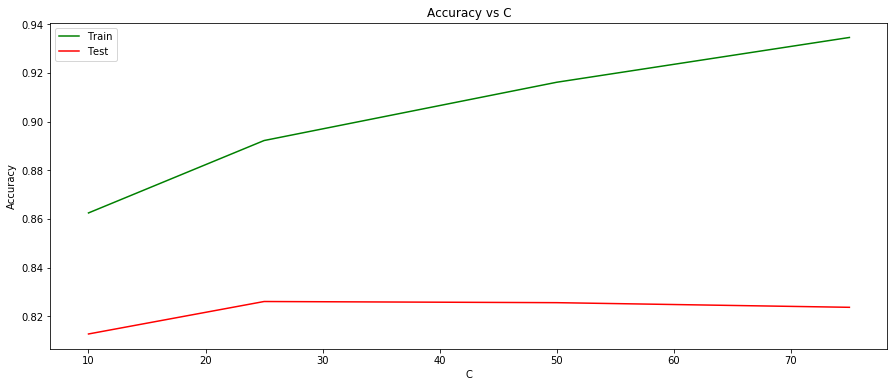

In [44]:
c = [10,25,50,75]
plt.figure(figsize=(15,6))
plt.plot(c, Train_Acc_Score,label = "Train", color='g')
plt.plot(c, Valid_Acc_Score, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.title("Accuracy vs C")
plt.legend()

<h4><font color ='purple'>Results Interpretation for SVM with different C:</font></h4>
    As the SVM is very time consuming paramter tuning is taking too much time so, I did considered the accuracy score up untill C = 75 plus we can even see that there is no increase in validation accuracy score after C = 25 as the difference between the accuracy test score and validation score is increasing. The Training accuracy is 89.2and Validation accuracy is 82.6 which looks better when compared to the model with default parameters but the model does overfitting the data. So far from this Parameter tuning we consider to go further with C = 25 due to the less training error when compared to error rate of model with other values for C.
    
    Since the model looks promissing I will be going further to predict the labels for the test data and submit those in the Kaggle in class compitetion inorder to understand the model's performance on the public data.

<h4><font color ='purple'>Loading the Test Dataset and Normalizing: Test Dataset shape (11921, 48, 48, 3)</font></h4>

In [47]:
# reading the test data files
images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))
images_test_public_rs = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0

In [48]:
Features3 = images_test_public_rs.shape[1]*images_test_public_rs.shape[2]*images_test_public_rs.shape[3]
Features3

6912

<h4><font color ='purple'>Reshaping the Normalized Test DataSet: Validation Dataset Shape (11921, 6912)</font></h4>

In [49]:
lst4 = [None] * images_test_public_rs.shape[0] # creating an empty array of size 98479
for i in range(images_test_public_rs.shape[0]):
    lst4[i] = images_test_public_rs[i].reshape([-1]) # reshaping each picture to 6912 features and storing it in lst1
#print(lst)
z = np.array(lst4).reshape(images_test_public_rs.shape[0],Features3) # converting the list to an array
print(z.shape)

(11921, 6912)


<h4><font color ='purple'>Fitting the Model 2 on the Sub sample and predicting the labels for the test data</font></h4>

In [53]:
model = SVC(C=25, gamma='auto', random_state = 26)
model = model.fit(Train_Sub_x, Train_Sub_y)
Val_pred = model.predict(z)

In [54]:
df1 = pd.DataFrame(Val_pred, columns=['Prediction'])
df1.tail() # creating a data frame for predicted values

,Prediction
11916,1
11917,1
11918,0
11919,0
11920,1


In [55]:
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail() # creating a data frame for files_val which contains image names

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [56]:
# Joining the two data frames through the index
Test_Public_pred_Acc_testpurpose_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [57]:
Test_Public_pred_Acc_testpurpose_45693242.head()

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,2
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0


In [58]:
Test_Public_pred_Acc_testpurpose_45693242.tail()

,ID,Prediction
11916,202595.jpg,1
11917,202596.jpg,1
11918,202597.jpg,0
11919,202598.jpg,0
11920,202599.jpg,1


<h4><font color ='purple'>Uploading the data Frame to a CSV File Named "Svm_ConventionalModel_45693242.csv"</font></h4>

In [59]:
Test_Public_pred_Acc_testpurpose_45693242.to_csv (r'C:\\Users\\suhas\\Downloads\\ML Practice\\Svm_ConventionalModel_45693242.csv', index = False, header=True)

<h4><font color ='purple'>Model 2 Performance on the Public data from Kaggle submission:</font></h4>
    Model 2's Accuracy score on the Test/Public data is 0.85127. We can see that our model is performing very good given that it is only trained on the 20000 observations, which is quite promising so I will be Going further to Fit the Final Model with the best parameters found from this model.

<h3><font color ='brown'>Model 3: Selected SVM with Best Parameters</font></h3>
    SVM with C=25, Kernel = 'rbf', gamma='auto' parameters is selected as the best Model 

<h4><font color ='purple'>Selected Model Fitting and Predicitng the Labels</font></h4>

In [9]:
model = SVC(C=25, kernel = 'rbf', gamma='auto', random_state = 26)
model = model.fit(x, labels_train)
Test_pred = model.predict(z)

In [13]:
df1 = pd.DataFrame(Test_pred, columns=['Prediction'])
df1.tail() # creating a data frame for predicted values

,Prediction
11916,1
11917,1
11918,0
11919,0
11920,1


In [14]:
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail() # creating a data frame for files_val which contains image names

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [15]:
# Joining the two data frames through the index
Test_Public_pred_Acc_testpurpose_45693242 = df2.merge(df1, left_index=True, right_index=True)

<h4><font color ='purple'>Uploading the data Frame to a CSV File Named "SVM_Coventional_fulldata_45693242.csv"</font></h4>

In [18]:
Test_Public_pred_Acc_testpurpose_45693242.to_csv (r'C:\\Users\\suhas\\Downloads\\ML Practice\\SVM_Coventional_fulldata_45693242.csv', index = False, header=True)

In [19]:
#saving the model for using this fiited model to predct the values next time directly

In [20]:
from pickle import dump

In [21]:
dump(model, open('model.pkl', 'wb'))

<h4><font color ='purple'>Kaggle Result:</font></h4>
The performance of this model on the public Data upon submitting in Kaggle Has come upto 0.87 Approx

 <h2><center><font color ='Red'>Section-2: Interpretation of Selected SVM model and HyperParameter selection</font></center></h2>

<h4><font color ='purple'>Selected SVM Results Interpretation:</font></h4>

    1) I havent performed accuracy scores on the train and validation in the final selected SVM model since I already Know from model-2 in the above section that SVM model is doing better with the parameters C = 25, gamma = 'auto', kernel = 'rbf' so, i skipped the accuracy part and predicted the values directly.
    2) The accuracy score for the test/Public Data from the Kaggle submission is 0.87526 which is a improvement by about 3.5% when compared with model-2.
    3) We can see that SVM Performs Better than Random Forest but not better when compared to Basic Deep Learning Model but the results were some what closer to the ones with Deep Learning Model.
    
<h4><font color ='purple'>Hyper Parameter Selection for the Selected SVM:</font></h4>
        
        1) I havent performed any hyper parameter selection in the final selected SVM model since I performed the hyperparameter tuning in model-2 from the above section.
            
            i) Accuracy score with 10 for C for validation is: 0.8126787416587226, Accuracy score with 10 for c for train is: 0.8624380971437147.
            ii) Accuracy score with 25 for C for validation is: 0.8260247855100096, Accuracy score with 25 for c for train is: 0.8922014906708019.
            iii) Accuracy score with 50 for C for validation is: 0.8255481410867492, Accuracy score with 50 for c for train is: 0.9161622730228602.
            iv) Accuracy score with 75 for C for validation is: 0.8236415633937083, Accuracy score with 75 for c for train is: 0.9345705567505378.
        2) We can see from the accuracy scores that model with c=25 is performing better than others due to the less training error.
        3) That is the reson I had selected that particular value for c and proceeded further for fitting the final model with the best parameters and predict the labels.

 <h2><center><font color ='Red'>Section-3: Random Forest (Additional Conventional Model)</font></center></h2>

<h3><font color ='coral'> Model Fitting :</font></h3>
    Random Forest Model is fitted on the Training set of size and shape (98479, 6912) and is validated on the validation set of size and shape (12270, 6912). At first we first fit the model with default parameters and compare this result with later model with best parameters. 
    
    1. Model 1: Random Forest with Default Paramters.
    2. Model 2: Random Forest with Hyper parameter to select the best paramters
    3. Model 3: Random Forest with Best Parameters.
    
    
<h4><font color ='purple'>Selecting the Training and Validation DataSets</font></h4> 
    Since, Random Forest is not Costly to perform compared to SVM (Which is Costly in terms of time consuming), I perform the analysis on the entire dataset. So, the entire training set is used for training the model and the validation datset for validating the model's performance. Eventhough it is faster than SVM it still takes time to compute all the operations as the data set is huge and due to the reason that random forest include the depth as maximum when no parameters are controlled to train the model by building the complete tree with nodes for each feature value, which inturn leading to overfitting. Which is why it is important to controll the depth Parameter and allong with I even look at no of estimators required.    

<h3><font color ='brown'>Model 1: Random Forest Classifier with default parameters</font></h3>

Accuracy score for validation is: 0.7973920130399348
Confusion matrix for validation is: [[3573   55  372    7]
 [  20 2479  313   40]
 [ 867  311 3302   27]
 [  56  275  143  430]]


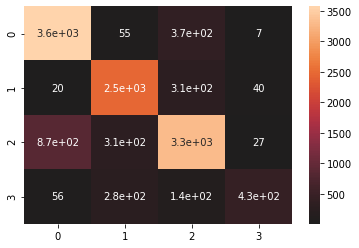

In [21]:
# Runnig Random Forest on default parameters
model = RandomForestClassifier(random_state = 26)
model = model.fit(x, labels_train)
y_pred = model.predict(y)
print("Accuracy score for validation is:",accuracy_score(labels_val, y_pred))
Def_Accu = accuracy_score(labels_val, y_pred)
cm = confusion_matrix(labels_val, y_pred)
print("Confusion matrix for validation is:", cm)
sns.heatmap(cm,annot = True , center=True)
plt.show()

<h4><font color ='purple'>Results Interpretation for Random Forest with default parameters:</font></h4>

1. Accuracy Score on the Validation data is 79%, which can be bad some times due to the fact that random forests tend to overfit the data when there is no constraint on max_depth because, when no depth value is mentioned it takes unlimited no of depths that are required to build a deeper tree with several splits one for each feature and captures more informatin about the data. with this behaviour they perform well on the training data but not on the new data.

2. From the confusion Matrix we can see that:
   
   a) The Model predicts the class 1 3573 times but misclassifeis 55 times as class 2, 372 times as class 3 and 7 times as class 4.
   
   b) The Model predicts the class 2 2479 times but misclassifeis 20 times as class 1, 313 times as class 3 and 40 times as class 4.
   
   c) The Model predicts the class 3 3302 times but misclassifeis 867 times as class 1, 311 times as class 2 and 27 times as class 4.
   
   d) The Model predicts the class 4 4303 times but misclassifeis 56 times as class 1, 275 times as class 2 and 143 times as class 3.
   
3. So now we look further with Some parameter tuning to determine which values fit the model better to the given dataset

<h4><font color ='purple'>Parameter Tuning For Random Forest:</font></h4> 
Since, Random Forest tends to overfit when no parameters are controlled, so I will be looking at the models performance for a range of estimators and depth to find which parameters that are providing better results and determine which parameters leading to overfit the data and avoid them.

<h3><font color ='brown'>Model 2: Parameter Tuning for Random Forest Classifier:</font></h3>

<h4><font color ='purple'>1) Looking at Random Forest Performance on different estimators:</font></h4>
     
     1. At first We will be looking at models performance for different estimators which are (1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 100, 200, 500).
     2.  Inorder to make the comparisons valid with the model with default parameter I am using the same Random state.

In [26]:
# Fitting the model for several Estimators rangiing from 25
Estimators = [25,50,100,150,200, 500]
Train_Acc_Score = []
Valid_Acc_Score = []
for e in Estimators:
    model = RandomForestClassifier(n_estimators = e, random_state = 26)
    model = model.fit(x, labels_train)
    Val_pred = model.predict(y)
    Val_Score = accuracy_score(labels_val, Val_pred)
    Valid_Acc_Score.append(Val_Score)
    print("Accuracy score with "+str(e)+" estimators for validation is:",Val_Score)
    Train_pred = model.predict(x)
    Train_Score = accuracy_score(labels_train, Train_pred)
    Train_Acc_Score.append(Train_Score)
    print("Accuracy score with "+str(e)+" estimators for train is:",Train_Score)

Accuracy score with 25 estimators for validation is: 0.7801140994295028
Accuracy score with 25 estimators for train is: 0.99936026970217
Accuracy score with 50 estimators for validation is: 0.7918500407497963
Accuracy score with 50 estimators for train is: 0.9999695366524843
Accuracy score with 100 estimators for validation is: 0.7973920130399348
Accuracy score with 100 estimators for train is: 1.0
Accuracy score with 150 estimators for validation is: 0.799918500407498
Accuracy score with 150 estimators for train is: 1.0
Accuracy score with 200 estimators for validation is: 0.8008149959250204
Accuracy score with 200 estimators for train is: 1.0
Accuracy score with 500 estimators for validation is: 0.8011409942950285
Accuracy score with 500 estimators for train is: 1.0


In [27]:
print(Train_Acc_Score)
print(Valid_Acc_Score)

[0.99936026970217, 0.9999695366524843, 1.0, 1.0, 1.0, 1.0]
[0.7801140994295028, 0.7918500407497963, 0.7973920130399348, 0.799918500407498, 0.8008149959250204, 0.8011409942950285]


<h4><font color ='purple'>
Accuracy Scores Interpretation based on estimator tuning:</font></h4>  
since we are controlling only estimators but not depth, we can see that Model tends to overfit the data as the accuracy scores for the traing sets for the given estimators is way better than the accuracy scores of Validation set. Meaning the model is overfiting and does not perform well on new data. to be sure on whether the model performs any better on smaller no of estimators, so, now let us look at a range of small estimators instead of large estimators.  

In [28]:
Estimators1 = [1, 2, 3, 4, 5, 10, 15, 20]
Train_Acc_Score1 = []
Valid_Acc_Score1 = []
for e in Estimators1:
    model = RandomForestClassifier(n_estimators = e, random_state = 26)
    model = model.fit(x, labels_train)
    Val_pred = model.predict(y)
    Val_Score = accuracy_score(labels_val, Val_pred)
    Valid_Acc_Score1.append(Val_Score)
    print("Accuracy score with "+str(e)+" estimators for validation is:",Val_Score)
    Train_pred = model.predict(x)
    Train_Score = accuracy_score(labels_train, Train_pred)
    Train_Acc_Score1.append(Train_Score)
    print("Accuracy score with "+str(e)+" estimators for train is:",Train_Score)

Accuracy score with 1 estimators for validation is: 0.6211898940505297
Accuracy score with 1 estimators for train is: 0.8667736268646107
Accuracy score with 2 estimators for validation is: 0.6246128769356153
Accuracy score with 2 estimators for train is: 0.8714040556869993
Accuracy score with 3 estimators for validation is: 0.680521597392013
Accuracy score with 3 estimators for train is: 0.9444856263771971
Accuracy score with 4 estimators for validation is: 0.6986960065199674
Accuracy score with 4 estimators for train is: 0.9540308085987875
Accuracy score with 5 estimators for validation is: 0.715158924205379
Accuracy score with 5 estimators for train is: 0.9730094741010774
Accuracy score with 10 estimators for validation is: 0.7489812550937245
Accuracy score with 10 estimators for train is: 0.9919475218066796
Accuracy score with 15 estimators for validation is: 0.7654441727791361
Accuracy score with 15 estimators for train is: 0.9975324688512271
Accuracy score with 20 estimators for v

In [29]:
print(Train_Acc_Score1)
print(Valid_Acc_Score1)

[0.8667736268646107, 0.8714040556869993, 0.9444856263771971, 0.9540308085987875, 0.9730094741010774, 0.9919475218066796, 0.9975324688512271, 0.9985783771159333]
[0.6211898940505297, 0.6246128769356153, 0.680521597392013, 0.6986960065199674, 0.715158924205379, 0.7489812550937245, 0.7654441727791361, 0.7756316218418908]


In [31]:
# joining the accuracy score of traing and validation for all no of estimators.
Train_Accuracy = Train_Acc_Score1 + Train_Acc_Score
Validation_Accuracy = Valid_Acc_Score1 + Valid_Acc_Score
No_of_Estimators = Estimators1 + Estimators

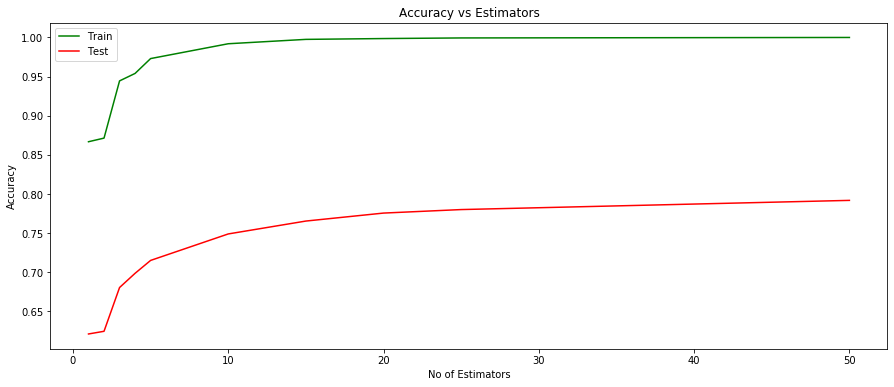

In [40]:
# plotting the accuracy score of traning and validation vs Estimators 
plt.figure(figsize=(15,6))
plt.plot(No_of_Estimators[:10], Train_Accuracy[:10],label = "Train", color='g')
plt.plot(No_of_Estimators[:10], Validation_Accuracy[:10], label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("No of Estimators")
plt.title("Accuracy vs Estimators")
plt.legend()

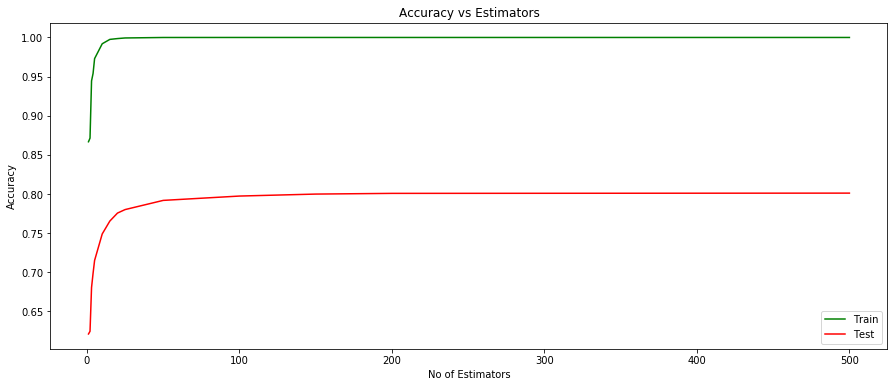

In [41]:
plt.figure(figsize=(15,6))
plt.plot(No_of_Estimators, Train_Accuracy,label = "Train", color='g')
plt.plot(No_of_Estimators, Validation_Accuracy, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("No of Estimators")
plt.title("Accuracy vs Estimators")
plt.legend()

<h4><font color ='purple'> Accuracy Scores Interpretation based on estimator tuning: </font></h4> 
     
     1. From the above plots, we can see that Model tends to perform well for estimors within the range 10 and 20, above that it will result in poor performance. Further more we look at model performace at various depths:
     2. So 3, 10, 15 estimators I am taking as the best Parameters

<h4><font color ='purple'>2) Looking at Random Forest Performance at different Depths:</font></h4>
     
     1. Now We will be looking at models performance at different depths which are (1, 2, 3, 4, 5, 6, 7, 8, 9, 10).
     2.  Inorder to make the comparisons valid with the model with default parameter I am using the same Random state.

In [42]:
# Depth Parameter tuning
# fitting the model at different depths
Depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Train_Acc_Score2 = []
Valid_Acc_Score2 = []
for e in Depth:
    model = RandomForestClassifier(max_depth = e, random_state = 26)
    model = model.fit(x, labels_train)
    Val_pred = model.predict(y)
    Val_Score = accuracy_score(labels_val, Val_pred)
    Valid_Acc_Score2.append(Val_Score)
    print("Accuracy score with "+str(e)+" depth for validation is:",Val_Score)
    Train_pred = model.predict(x)
    Train_Score = accuracy_score(labels_train, Train_pred)
    Train_Acc_Score2.append(Train_Score)
    print("Accuracy score with "+str(e)+" depth for train is:",Train_Score)

Accuracy score with 1 depth for validation is: 0.5785656071719641
Accuracy score with 1 depth for train is: 0.6214218259730501
Accuracy score with 2 depth for validation is: 0.6687041564792175
Accuracy score with 2 depth for train is: 0.6926755958123052
Accuracy score with 3 depth for validation is: 0.6925020374898125
Accuracy score with 3 depth for train is: 0.709846769361996
Accuracy score with 4 depth for validation is: 0.7039934800325999
Accuracy score with 4 depth for train is: 0.7201433808223073
Accuracy score with 5 depth for validation is: 0.7269763651181744
Accuracy score with 5 depth for train is: 0.7420668365844495
Accuracy score with 6 depth for validation is: 0.7414832925835371
Accuracy score with 6 depth for train is: 0.7572680469947908
Accuracy score with 7 depth for validation is: 0.7509372453137735
Accuracy score with 7 depth for train is: 0.7732714588897125
Accuracy score with 8 depth for validation is: 0.7622656886715566
Accuracy score with 8 depth for train is: 0.79

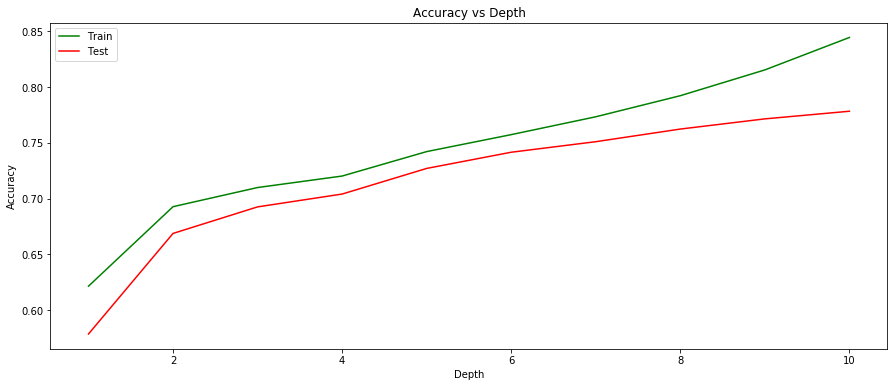

In [44]:
plt.figure(figsize=(15,6))
plt.plot(Depth, Train_Acc_Score2,label = "Train", color='g')
plt.plot(Depth, Valid_Acc_Score2, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.title("Accuracy vs Depth")
plt.legend()

<h4><font color ='purple'>Accuracy Scores Interpretation based on Depth tuning: </font></h4>
    
    1. As we are controlling the depth, we can see that Model is not overfitting since the accuracy score difference between training and validation is not differing by too much. After the Depth 10 the model seems not to perform as beeter as depth at 8.
    2. So Selecting the Depth 5 and 6 as the best Parameters

<h4><font color ='purple'>3) Fitting the Random Forest with all the possible combinations of the Best Parameters:</font></h4>

Since RFC seems to perform well at depth 5 and 6, at estimators 3, 10, 15. I will be fitting the model for all the combinations and decide which model is performing best and use that model for predicting the test/public values.  
     
Below are the model that I will be looking at:
1. Model 1 with n_estimators = 3, max_depth = 5 
2. Model 2 with n_estimators = 3, max_depth = 6
3. Model 3 with n_estimators = 10, max_depth = 5
4. Model 4 with n_estimators = 10, max_depth = 6
5. Model 5 with n_estimators = 15, max_depth = 5
6. Model 6 with n_estimators = 15, max_depth = 6

In [53]:
Models = [1, 2, 3, 4, 5, 6]
Train_Acc_Score3 = []
Valid_Acc_Score3 = []

In [54]:
# Model 1 with n_estimators = 3, max_depth = 5
model = RandomForestClassifier(n_estimators = 3, max_depth = 5, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)


Accuracy score with 3 estimators and 2 depth for validation is: 0.6916055419722902
Accuracy score with 3 estimators and 2 depth for train is: 0.7084149920287574


In [55]:
# Model 2 with n_estimators = 3, max_depth = 6
model = RandomForestClassifier(n_estimators = 3, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.710839445802771
Accuracy score with 3 estimators and 2 depth for train is: 0.7231795611247068


In [57]:
# Model 3 with n_estimators = 10, max_depth = 5
model = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7162999185004075
Accuracy score with 3 estimators and 2 depth for train is: 0.7306836990627443


In [58]:
# Model 4 with n_estimators = 10, max_depth = 6
model = RandomForestClassifier(n_estimators = 10, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7329258353708231
Accuracy score with 3 estimators and 2 depth for train is: 0.7477330192223722


In [59]:
# Model 5 with n_estimators = 15, max_depth = 5
model = RandomForestClassifier(n_estimators = 15, max_depth = 5, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7207823960880195
Accuracy score with 3 estimators and 2 depth for train is: 0.7336487982209405


In [60]:
# Model 6 with n_estimators = 15, max_depth = 6
model = RandomForestClassifier(n_estimators = 15, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Val_pred = model.predict(y)
Val_Score = accuracy_score(labels_val, Val_pred)
Valid_Acc_Score3.append(Val_Score)
print("Accuracy score with 3 estimators and 2 depth for validation is:",Val_Score)
Train_pred = model.predict(x)
Train_Score = accuracy_score(labels_train, Train_pred)
Train_Acc_Score3.append(Train_Score)
print("Accuracy score with 3 estimators and 2 depth for train is:",Train_Score)

Accuracy score with 3 estimators and 2 depth for validation is: 0.7352078239608802
Accuracy score with 3 estimators and 2 depth for train is: 0.7501599325744575


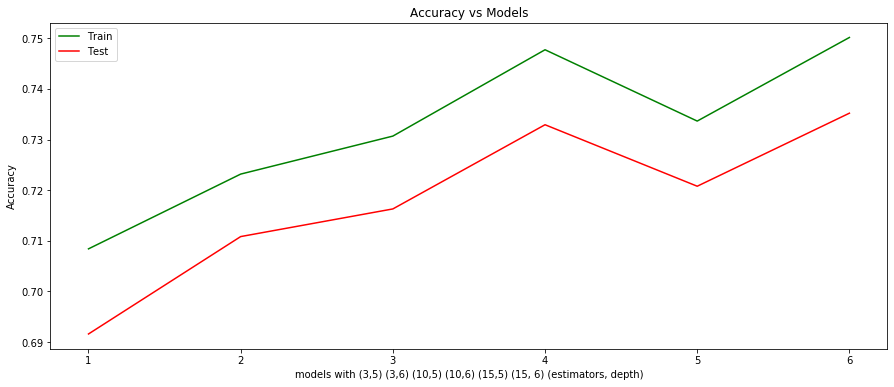

In [61]:
plt.figure(figsize=(15,6))
plt.plot(Models, Train_Acc_Score3,label = "Train", color='g')
plt.plot(Models, Valid_Acc_Score3, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("models with (3,5) (3,6) (10,5) (10,6) (15,5) (15, 6) (estimators, depth)")
plt.title("Accuracy vs Models")
plt.legend()

<h4><font color ='purple'>Best Model Selection based on the Accuracy scores:</font></h4>
 From the plot as well as accuracy scores of individual Models we can see that model 4, 5 is performing better when compared to other models. so we use Model 4 to predict the Test Data
 
 Best Model Selected from Random FOrest Classifier would be a Random Forest with Depth 6 and Estimators 10 for predicting with random State as 26.

<h3><font color ='brown'>Model 3: Fitting the best Random Forest Classifier:</font></h3>
 Best Model Selected from Random FOrest Classifier would be a Random Forest with Depth 6 and Estimators 10 for predicting with random State as 26.

In [75]:
# Final Model For Fitting 
model = RandomForestClassifier(n_estimators = 10, max_depth = 6, random_state = 26)
model = model.fit(x, labels_train)
Test_Public_pred = model.predict(z)

In [88]:
Test_Public_pred_copy = Test_Public_pred # making a copy of the Predicted values for safety

In [107]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Test_Public_pred_copy, columns=['Prediction'])
df1.tail()

,Prediction
11916,1
11917,2
11918,0
11919,0
11920,1


In [108]:
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [109]:
# Joining the two data frames through the index
Test_Public_pred_Acc_testpurpose_45693242 = df2.merge(df1, left_index=True, right_index=True)

<h4><font color ='purple'>Uploading the data Frame to a CSV File Named "Test_Public_pred_Acc_testpurpose_45693242.csv": </font></h4>

In [112]:
Test_Public_pred_Acc_testpurpose_45693242.to_csv (r'C:\\Users\\suhas\\Downloads\\ML Practice\\Test_Public_pred_Acc_testpurpose_45693242.csv', index = False, header=True)

 <h2><center><font color ='Red'>Section-4: Interpretation of Additional Conventional model (Random Forest Classifier) and HyperParameter selection</font></center></h2>

<h4><font color ='purple'>Best RFC Results Interpretation:</font></h4>

    1) I havent performed accuracy scores on the train and validation in the final RFC model since I already Know from model-2 in the above section that RFC model is doing better with the parameters estimators = 10, depth = 6 so, i skipped the accuracy part and predicted the values directly.
    2) The accuracy score for the test/Public Data from the Kaggle submission is 0.74809 which is very bad when compared to the SVM (87% approx) Model with best Parameters, where SVM Outperforms RFC by about 13%.
    3) RFC performs bad when compared to the Basic Deep Learning Model.
    
<h4><font color ='purple'>Hyper Parameter Selection for the Best RFC:</font></h4>
        
        1) I havent performed any hyper parameter selection in the final selected SVM model since I performed the hyperparameter tuning in model-2 from the above section.
        2) Based on the accuracy scores for the model on different parameter values I selected the estimators as 10 and Depth as 6 for the Final Model.    
            

 <h2><center><font color ='Red'>Section-5: Basic CNN with Data Augmentation(Convolutional Model) and Transfer Learning Using VGG19</font></center></h2>

Keras with Tensorflow framework is used in this section for building a Fully connected neural network and Convolutional neural network.

In this section the following two are the neural networks build for classifying the hair color of the celb-a Dataset:
1. Convolutional neural network
2. Transfer Learning with VGG19

<h4><font color ='brown'>Why Fully connected Neural Networks is not Useful?</font></h4>

Dis-advantages of Fully Connected Neural Networks:
1. When a model is trained on an image for example lets take a CAT, then we had given the same image for prediction but flipped the image. In this case the model classifies an image as cat if it matches exactly (including position) and miscalssifies the flipped image as not cat eventhough it is a cat.
2. The Fully connected neural networks are computationally expensive. Since each input feature is connected to every neuron in the following layer and the trend continues till the Output layer.
3. This is why I didnt included the Fully connected Model in the Final Submission.

Source: https://www.quora.com/What-are-the-advantages-and-disadvantages-of-fully-connected-layers-in-convolutional-neural-network

<h4><font color ='brown'>About connected Neural Networks and its Advantages:</font></h4>
Recent Findings say that only a few number of neurons in a human brain is responsible for a part of an image, for example if we take a house some neurons will focus on horizontal lines, some neurons would react to more complex patterns like any engravings on the walls.

#### Layers: 
A Typical CNN Model would have a following layer:
1. CONvolutional Layer
2. Max pooling or Average Polling Layer
3. Batch Normalization Layer
4. Dense LAyer
5. Drop out Layer

#### Advantages: 
1. In CNN only a few neurons will focus on certain parts of images (input features) instead of each neuron focusing on each input feture (fully connected Network), due to which we can have filters in CNN for any input. So, the model will get trained on the individual Filters so when a same image is given for prediction with a vertical flip, CNN's can still classify an Image.
        For example: 
        let's Take a cat when a CNN Model is trained the model will get trained on features like Ears, eyes, whiskers. so, when the model finds similar features in the new image irrespective of the position the model classifies the image as cat.
    1. Layer1 in the CNN might be responsible for some lines, lines with orientation, some shapes and so on...
    2. Layer2 take input from layer 1 and starts building more complex features say outline of cat ears and so on...
    3. Layern will get the input from previous layers and can identify the cat face or whole cat itself.
2. Since only few neurons is responsible for certain part of an image the computation time will be faster compared to Neural Networks

#### Batch Normalization:
Even our input data is Normalized and feed to a CNN neural networks each weights associated with the neuron would get updated during each epoch via Adam Optimizer in the backward propogation technique. So, it can be possible that some weights of the neurons in a layer would get large compared to the others and therby this weights imbalance will affect the Output. for this reason we normalize the output comming out from the Conv2D layers.  

Source: https://www.youtube.com/watch?v=dXB-KQYkzNU&t=251s

<h3><font color ='coral'>1) Preprocessing and Feature Extraction :</font></h3>
    
    1. Setting the random Seed at the begining such that it would help us in reproducing similar results.
    2.Before Proceeding further we need to do some preprocessing on the Target Lables of the Train and Test Data In order for the model to start learning as the CNN model Treats the labels as one hot vectors.
    3.Here we dont need to reshape the Data into 2d as the convolutional models work with 3 Dimensions data.
    4. Preffered saving method for Deep learning models.

<h4><font color ='Brown'>1) Setting the Random Seed for getting Reproducable results:</font></h4>
Usally when a Gpu is used for training the models the results will not come same every time we ran the same code due to the randomness form the complex GPU libraries. There is Some evidence that when NVDIA GPU's are used (CUDNN) reproducible results cannot be attained.

Source: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

Source: https://www.youtube.com/watch?v=HcW0DeWRggs


In [2]:
# Inidcating That it is necessary for any hash based algorithms to produce reproducable values 
os.environ['PYTHONHASHSEED'] = '1'
np.random.seed(2020) # Seed for numpy random numbers
random.seed(2020) # Seed for python 
tf.random.set_seed(2020) # Seed for tensorflow
# We need to force tensorflow to use single thread for getting reproducable results
# Because multiple threads will effect the reproducability (getting the same results everytime)
# Cur_Session = tf.compat.v1.Session(graph = tf.get_default_graph(), config = session_conf)
# BD.set_session(Cur_Session)
# the last two lines will not work for a GPU

<h4><font color ='brown'>2) Creating the One Hot Vectors for the Labels:</font></h4>
currently our target variable ranges in between 0-3 representing hair colors, but we need to provide the labels as one hot vector meaning in our case 1000, 0100, 0010, 0001 represents black, blond, brown, gray such that at any point of time one class has the value 1 and the others are set to 0.

In [3]:
num_classes = len(hair_colours) # no of classes
labels_train_rs = keras.utils.to_categorical(labels_train, num_classes) # Generating a One hot vector for the Train labels Data
labels_val_rs = keras.utils.to_categorical(labels_val, num_classes) # Generating One Hot vector for the Validation Data
print("Train Labels Shape:", labels_train_rs.shape)
print("Validation Labels Shape:", labels_val_rs.shape)

Train Labels Shape: (98479, 4)
Validation Labels Shape: (12270, 4)


<h4><font color ='brown'>3) No Need to reshape the data to 2d :</font></h4>
The Input shape acceptable by the Convolutional Models is (height, width, depth)

In [6]:
print("Input dimensions of images_train_rs are: ",images_train_rs.shape[1:]) # Excludes the first column that represnts no of rows

Input dimensions of images_train_rs are:  (48, 48, 3)


Now the data is in the correct format (input features in 3D, Labels as One hot vectors) for a neural network to start Learning.

<h4><font color ='brown'>4) Preffered saving method for saving Models:</font></h4>
.h5 is the preffered mode of saving a model in keras which stores the weights of the model along with the structure of model, loss and metrics, model optimizer state.

Source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

<h3><font color ='coral'>2) Model Fitting :</font></h3>
The Selected Model From Deep LEarning Section Would be Basic CNN with Data Augmentation, I also treat VGG19 as my Best selected model as the accuracy scores of both model is same

    1. At first I fitted a CNN model which is Built from scrath.
    2. Then I used the Data Augmentation to improve the Seleceted Models Performance Further More.
    3. Using Transfer Learning of VGG19 to classify our Data.
    4. Using Transfer Learning of VGG19 with Data Augmentation. 

<h3><font color ='brown'>Model 1: Building CNN From Scratch</font></h3>
Basic CNN Model with 5 CONV Layers, 3 Dense Layers with selu activation, 4 Dropout layers function (these Drop out layers will help the model to not overfit) and 3 BatchNormalization layers (which makes sure that the output from each neuron would be in the same range and also help in not overfitting).

Here we need to define the input size to the first layer only and the rest of the layers will get the input from the previous layers.

In [5]:
CNN_S = keras.models.Sequential([
   
    keras.layers.Conv2D(32, 5, activation="selu", padding="same", input_shape=[48,48,3]),
    keras.layers.Conv2D(32, 5, activation="selu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(64, 3, activation="selu", padding="same"),
    keras.layers.Conv2D(64, 3, activation="selu", padding="same"),
    keras.layers.MaxPooling2D(2),    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, 3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "selu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation = "selu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(num_classes, activation="softmax")    
])


CNN_S.summary()

opt = keras.optimizers.Adam(learning_rate=0.0005)

CNN_S.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [6]:
CNN_S_Output = CNN_S.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Epoch 1/15
329/329 [==============================] - 41s 124ms/step - accuracy: 0.7425 - loss: 0.9093 - val_accuracy: 0.4141 - val_loss: 2.8664
Epoch 2/15
329/329 [==============================] - 40s 120ms/step - accuracy: 0.8281 - loss: 0.5072 - val_accuracy: 0.8606 - val_loss: 0.3958
Epoch 3/15
329/329 [==============================] - 40s 120ms/step - accuracy: 0.8621 - loss: 0.3867 - val_accuracy: 0.8767 - val_loss: 0.3274
Epoch 4/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8794 - loss: 0.3305 - val_accuracy: 0.8954 - val_loss: 0.2789
Epoch 5/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8920 - loss: 0.2974 - val_accuracy: 0.8724 - val_loss: 0.3485
Epoch 6/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8984 - loss: 0.2782 - val_accuracy: 0.8697 - val_loss: 0.3539
Epoch 7/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.9031 - loss: 0.2643 - val_accuracy: 0.9054 - va

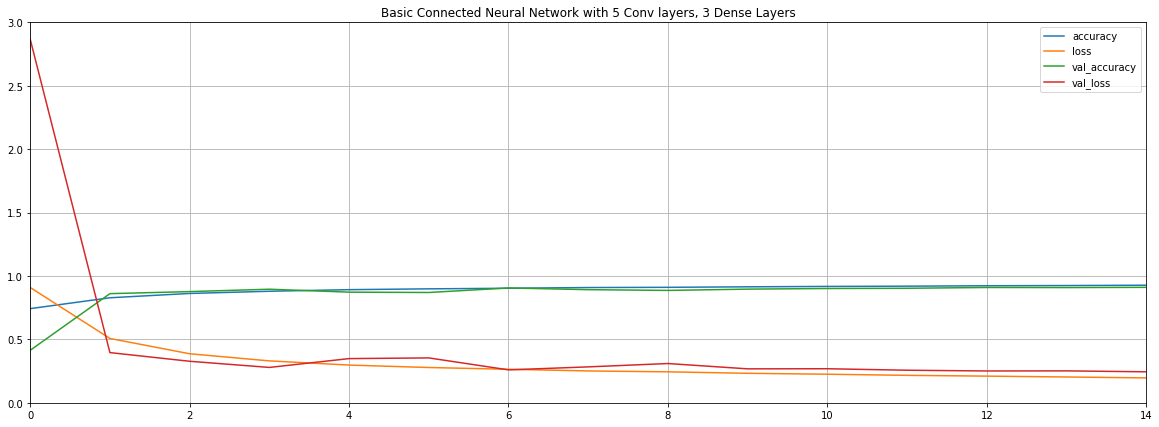

In [7]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_S_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.title("Basic Connected Neural Network with 5 Conv layers, 3 Dense Layers")
plt.show()

<h4><font color ='purple'>Results Interpretation for Basic CNN:</font></h4>
* From the Model Summary we can see that Total Trainable Parameters are 4,910,500 which is huge given that our total observations were at 120,000 approx, so this model may overfit but perrform's better than the Convolutional Neural networks.

* From the Plot we can see that Validation loss is decreasing ,the validation accuracy seems to increase from 41% to 91.04% by epoch 15. On the other hand training loss tend to decrease and accuracy scores tend to increase with increase in epochs. upon looking the Trainig accuracy score and Validation accuracy, scores seems close to each other with a differnce of 1% which is a good sign.
Since this model seems to perform well on the data so we further look at the model performance with augmented Data.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [67]:
CNN_S_probabilities = CNN_S.predict([images_test_public_rs]) # Predicting the Probabilities

In [68]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_S_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [69]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [70]:
# Joining the two data frames through the index
CNN_S_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [71]:
CNN_S_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_S_45693242.csv', index = False, header=True)

In [73]:
CNN_S.save("CNN_S.h5")  ## Best MOdel So For In CNN with 92.7 on the test data 

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model on the Public data is 0.92743. which is good and is the best of all the models

<h3><font color ='brown'>Model 2: CNN with Data Augmentation (Selected Model in Deep Learning)</font></h3>

In [8]:
CNN_S_OA_DA = tf.keras.models.load_model('CNN_S.h5') # Loading the Model

In [13]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             shear_range = 0.2,
                             horizontal_flip = True, 
                             fill_mode='nearest')
# Techniques for Data Augmemtation

In [14]:
x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)

In [15]:
batch_size = 300
CNN_S_OA_DA_Output = CNN_S_OA_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 9, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

Epoch 1/9
329/328 [==============================] - 64s 196ms/step - accuracy: 0.9019 - loss: 0.2703 - val_accuracy: 0.8950 - val_loss: 0.2839
Epoch 2/9
329/328 [==============================] - 64s 196ms/step - accuracy: 0.9033 - loss: 0.2666 - val_accuracy: 0.8650 - val_loss: 0.3293
Epoch 3/9
329/328 [==============================] - 65s 197ms/step - accuracy: 0.9038 - loss: 0.2626 - val_accuracy: 0.8703 - val_loss: 0.3265
Epoch 4/9
329/328 [==============================] - 76s 233ms/step - accuracy: 0.9047 - loss: 0.2616 - val_accuracy: 0.9007 - val_loss: 0.2638
Epoch 5/9
329/328 [==============================] - 77s 234ms/step - accuracy: 0.9066 - loss: 0.2560 - val_accuracy: 0.9157 - val_loss: 0.2319
Epoch 6/9
329/328 [==============================] - 73s 221ms/step - accuracy: 0.9080 - loss: 0.2533 - val_accuracy: 0.9077 - val_loss: 0.2426
Epoch 7/9
329/328 [==============================] - 66s 201ms/step - accuracy: 0.9084 - loss: 0.2519 - val_accuracy: 0.9008 - val_loss:

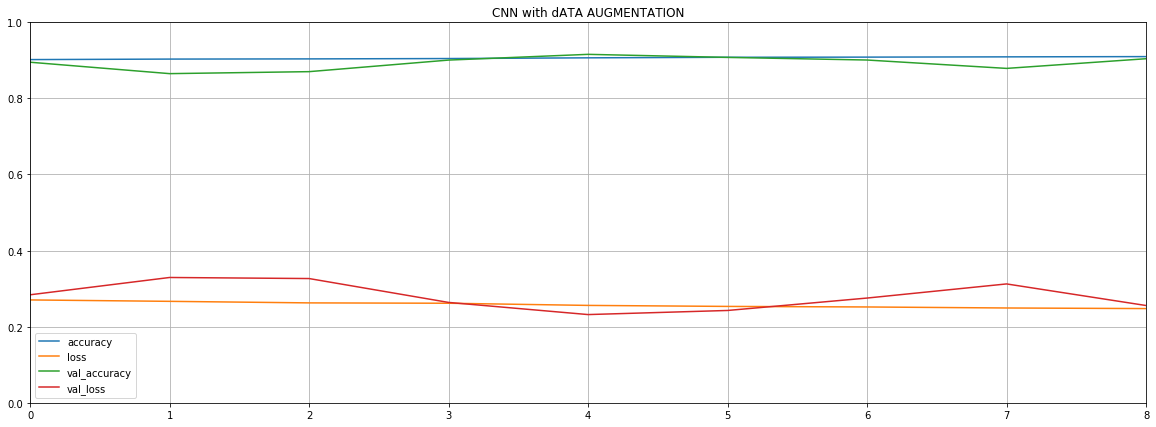

In [16]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_S_OA_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("CNN with dATA AUGMENTATION")
plt.show()

<h4><font color ='purple'>Results Interpretation for Basic CNN with Data Augmentation:</font></h4>

* From the Plot we can see that Validation seems to fluctuate and is decreasing on slow steady rate and the validation accuracy seems to increase and reach 90.42% by epoch 9. On the other hand training loss tend to decrease and accuracy scores tend to increase with increase in epochs. upon looking the Trainig accuracy score and Validation accuracy scores seems close to each other with a differnce of 0.4% which is similar to Basic CNN Model. 
* I will be using this model as my Selecetd CNN model from deep learning model because, this model has a better chance of classifying the images that include some filters in it, which is not possible with the Basic CNN.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [26]:
CNN_S_DA_probabilities = CNN_S_OA_DA.predict([images_test_public_rs])

In [27]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_S_DA_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 1 0 ... 0 0 2]
Length of Predicted labels: 11921


In [28]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [29]:
# Joining the two data frames through the index
CNN_S_DA_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [30]:
CNN_S_DA_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_Final2_45693242.csv', index = False, header=True)

In [31]:
CNN_S_OA_DA.save("CNN_S_OA_DA.h5")  # Best Model So for with Data Augmentation

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model with Data Augmentation on the Public data is 0.92618. which is good and is the better than the BAsic CNN due to the added advantage of classifying the images with more intense filiters.

<h3><font color ='brown'>Model 3: TRANSFER LEARNING with VGG19 (Next Best Model in Deep Learning Model): </font></h3>
There are several CNN model's that performed well on the Imagenet dataset which is mixture of 1000 classes with a million of pictures. So,we can make use of the information from lower layers of the Already trained models and modify the uppr layers such that the situtaion suits our case, in doing so we can expect better accuracy scores compared to the basic CNN that we build.

In this section I will be focusing on VGG19 Model, I had even tried other Transfer learning models like Resnet, Mobilenetv2 but not included in this final version because of their poor performance on the validation data as well as training data.

In [4]:
input_shape = (48,48,3)

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by freezing all the layers</font></h4>
As a first step I am looking at how the model performs when all the layers were frozen (such that weights are fixed). VGG19 with input shape (48,48,3), imagenet weigths are used. 

In [35]:
vgg = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [36]:
#Freezing all layers in VGG19 so that the weights wont be changed
for layer in vgg.layers:
    layer.trainable = False
    print("The Layer "+layer.name+" is Successfully Frozen")

The Layer input_2 is Successfully Frozen
The Layer block1_conv1 is Successfully Frozen
The Layer block1_conv2 is Successfully Frozen
The Layer block1_pool is Successfully Frozen
The Layer block2_conv1 is Successfully Frozen
The Layer block2_conv2 is Successfully Frozen
The Layer block2_pool is Successfully Frozen
The Layer block3_conv1 is Successfully Frozen
The Layer block3_conv2 is Successfully Frozen
The Layer block3_conv3 is Successfully Frozen
The Layer block3_conv4 is Successfully Frozen
The Layer block3_pool is Successfully Frozen
The Layer block4_conv1 is Successfully Frozen
The Layer block4_conv2 is Successfully Frozen
The Layer block4_conv3 is Successfully Frozen
The Layer block4_conv4 is Successfully Frozen
The Layer block4_pool is Successfully Frozen
The Layer block5_conv1 is Successfully Frozen
The Layer block5_conv2 is Successfully Frozen
The Layer block5_conv3 is Successfully Frozen
The Layer block5_conv4 is Successfully Frozen
The Layer block5_pool is Successfully Froze

In [37]:
# We take the output coming from the last layer and feed i to the last newly added layers of our own
vgg_last  = vgg.layers[-1].output
new_layer = Flatten()(vgg_last) # Flattening the output layer of vgg
new_layer = Dense(1000, activation = "selu", name = "DenseFullyConnected")(new_layer) # new dense layer adding to the vgg
new_layer = Dropout(0.2) (new_layer) # new Drop out layer
new_layer = Dense(num_classes, activation="softmax", name="Predictions") (new_layer) # new output layer adding to the dense layer
model     = Model(vgg.input, new_layer) # building the model
# Compiling the model
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [38]:
vgg1_Output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Train on 98479 samples, validate on 12270 samples
Epoch 1/15
98479/98479 [==============================] - 73s 741us/step - loss: 0.7727 - accuracy: 0.6739 - val_loss: 0.7044 - val_accuracy: 0.7022
Epoch 2/15
98479/98479 [==============================] - 63s 640us/step - loss: 0.6856 - accuracy: 0.7112 - val_loss: 0.6697 - val_accuracy: 0.7145
Epoch 3/15
98479/98479 [==============================] - 64s 645us/step - loss: 0.6673 - accuracy: 0.7210 - val_loss: 0.6732 - val_accuracy: 0.7152
Epoch 4/15
98479/98479 [==============================] - 63s 642us/step - loss: 0.6599 - accuracy: 0.7245 - val_loss: 0.6528 - val_accuracy: 0.7219
Epoch 5/15
98479/98479 [==============================] - 64s 646us/step - loss: 0.6527 - accuracy: 0.7268 - val_loss: 0.6788 - val_accuracy: 0.7104
Epoch 6/15
98479/98479 [==============================] - 63s 643us/step - loss: 0.6464 - accuracy: 0.7294 - val_loss: 0.6574 - val_accuracy: 0.7206
Epoch 7/15
98479/98479 [==============================] 

<h4><font color ='purple'>Results Interpretation of Transfer Learning using VGG19 :</font></h4>
* From the Model Summary we can see that Total Trainable Parameters are 517,004 (Total Parameters are: 20,541,388) which is because we frezed all the layer in  between such that weights will be fixed, our Observations data sits around 120,000 approx which is 3 times less than the parameters.

* From the scores we can see that Validation loss is decreasing but the validation accuracy is not increasing and is staying constant around 71% and 74%, the same goes for the training scores as well. The Training accuracy is 74.29 , the Validation accuracy is 73.81 we can see that now the model is not performing good upon freezing all the layers.

* So, it's better if we train some last layers.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by un-freezing some layers</font></h4>
The VGG model is not performing well on the data with freezing all the layers because the final layers may contain different information which is not usefull or irrelevant for our data classification. So, we now train 20% of the layers from the bottom so that we make use of features from lower layers which are usefull and train the rest of the unfrozen layers along with the Dense layers.

In [13]:
vgg1 = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)
#Freezing all layers in VGG19 so that the weights wont be changed
for layer in vgg1.layers:
    if layer.name == "block4_conv1":
        break
    layer.trainable = False
    print("The Layer "+layer.name+" is Successfully Frozen")

The Layer input_4 is Successfully Frozen
The Layer block1_conv1 is Successfully Frozen
The Layer block1_conv2 is Successfully Frozen
The Layer block1_pool is Successfully Frozen
The Layer block2_conv1 is Successfully Frozen
The Layer block2_conv2 is Successfully Frozen
The Layer block2_pool is Successfully Frozen
The Layer block3_conv1 is Successfully Frozen
The Layer block3_conv2 is Successfully Frozen
The Layer block3_conv3 is Successfully Frozen
The Layer block3_conv4 is Successfully Frozen
The Layer block3_pool is Successfully Frozen


In [14]:
# We take the output coming from the last layer and feed i to the last newly added layers of our own
vgg_last1  = vgg1.layers[-1].output
new_layer = Flatten()(vgg_last1) # Flattening the output layer of vgg
new_layer = Dense(1000, activation = "selu", name = "DenseFullyConnected")(new_layer) # new dense layer adding to the vgg
new_layer = Dropout(0.2) (new_layer) # new Drop out layer
new_layer = Dense(num_classes, activation="softmax", name="Predictions") (new_layer) # new output layer adding to the dense layer
model     = Model(vgg1.input, new_layer) # building the model
# Compiling the model
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [15]:
#https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2
vgg1_Output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=12,
                       validation_data=(images_val_rs, labels_val_rs))

Train on 98479 samples, validate on 12270 samples
Epoch 1/12
98479/98479 [==============================] - 109s 1ms/step - loss: 0.8070 - accuracy: 0.6572 - val_loss: 0.5414 - val_accuracy: 0.7947
Epoch 2/12
98479/98479 [==============================] - 109s 1ms/step - loss: 0.4192 - accuracy: 0.8390 - val_loss: 0.4522 - val_accuracy: 0.8187
Epoch 3/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.3547 - accuracy: 0.8634 - val_loss: 0.3344 - val_accuracy: 0.8747
Epoch 4/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.3246 - accuracy: 0.8765 - val_loss: 0.3209 - val_accuracy: 0.8793
Epoch 5/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.3075 - accuracy: 0.8838 - val_loss: 0.3040 - val_accuracy: 0.8868
Epoch 6/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.2965 - accuracy: 0.8872 - val_loss: 0.3070 - val_accuracy: 0.8819
Epoch 7/12
98479/98479 [==============================] - 109s

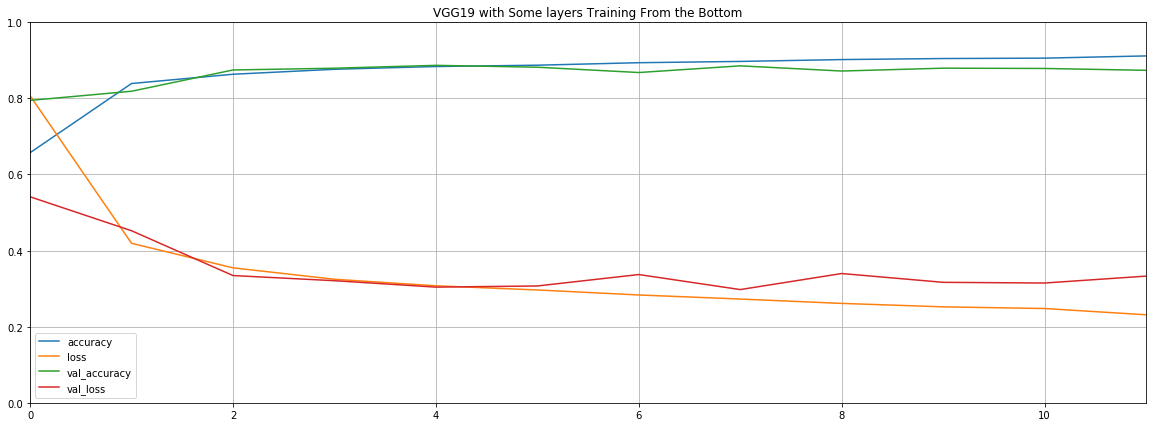

In [16]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(vgg1_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("VGG19 with Some layers Training From the Bottom")
plt.show()

<h4><font color ='Purple'>Result Interpretation for TRANSFER LEARNING with VGG19 by unfreezing some layers</font></h4>
* From the Model Summary we can see that Total Trainable Parameters are 18,215,820 which is because we had unfrozen 40% of the layer's, our Observations data sits around 120,000 approx which is very less compared to current parameters.

* From the plot we can see that Validation loss is decreasing with a spike in between but the validation accuracy is increasing and reaching upto 87.30, on the other hand the training loss is decreasing with the increase in training accuracy. The Training accuracy is 91.16, the Validation accuracy is 87.38 we can say that this model is performing good upon compared to the one with freezing all the layers.

So we further try to increase the Performance with some data augmentation.
THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [58]:
Vgg1_probabilities = model.predict([images_test_public_rs])

In [59]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(Vgg1_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [60]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])

In [61]:
# Joining the two data frames through the index
VGG19_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [62]:
VGG19_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG19_45693242.csv', index = False, header=True)

In [63]:
model.save("VGG19Final.h5")  #Saving the Model so far it is the second best model which is closer to the base model

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model with Data Augmentation on the Public data is 91.5% which is good and is not better than the BAsic CNN but has an added advantage of classifying the images with more intense filiters.

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by un-freezing some layers along with Data Augmentation</font></h4>
Now we increase the performance of Transfer learning (some layers trainable) by using Some Augmented Data.

In [17]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             shear_range = 0.2,
                             horizontal_flip = True, 
                             fill_mode='nearest')

x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)
vgg_DA = tf.keras.models.load_model('VGG19Final.h5')
batch_size = 300
VGGF_DA_Output = vgg_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 15, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

Epoch 1/15
329/328 [==============================] - 104s 315ms/step - loss: 0.3773 - accuracy: 0.8546 - val_accuracy: 0.8570 - val_loss: 0.3639
Epoch 2/15
329/328 [==============================] - 101s 308ms/step - loss: 0.3507 - accuracy: 0.8671 - val_accuracy: 0.8816 - val_loss: 0.3105
Epoch 3/15
329/328 [==============================] - 102s 309ms/step - loss: 0.3434 - accuracy: 0.8691 - val_accuracy: 0.8607 - val_loss: 0.3671
Epoch 4/15
329/328 [==============================] - 102s 309ms/step - loss: 0.3326 - accuracy: 0.8739 - val_accuracy: 0.8880 - val_loss: 0.2890
Epoch 5/15
329/328 [==============================] - 102s 309ms/step - loss: 0.3270 - accuracy: 0.8762 - val_accuracy: 0.8835 - val_loss: 0.3029
Epoch 6/15
329/328 [==============================] - 105s 318ms/step - loss: 0.3244 - accuracy: 0.8774 - val_accuracy: 0.8550 - val_loss: 0.3640
Epoch 7/15
329/328 [==============================] - 109s 332ms/step - loss: 0.3281 - accuracy: 0.8748 - val_accuracy: 0.87

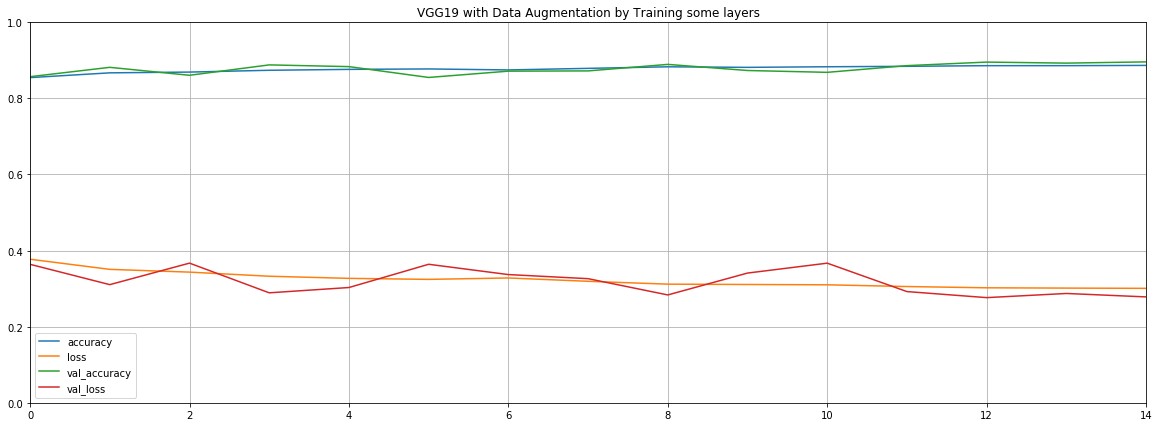

In [18]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(VGGF_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("VGG19 with Data Augmentation by Training some layers")
plt.show()

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by un-freezing some layers</font></h4>

* From the plot we can see that Validation loss is decreasing and increasing between the given range of epochs but the validation accuracy is increasing slightly and reaching closely to the training accuracy, on the other hand the training loss is decreasing with the increase in training accuracy. The Training accuracy is 88.67 , the Validation accuracy is 89.59 we can say that this model is performing good upon compared to the one with freezing all the layers and the one with some unfrozen layers.

* I will be Using this Model as the 2nd Best from Deep Learning Section since the Performance of this model and the Basic CNN wtih Data Augmentation has same performance on both test/public and Private Data.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [66]:
Vgg2_probabilities = vgg_DA.predict([images_test_public_rs])
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(Vgg2_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])

the first five Predicted classes are: [0 2 0 ... 0 0 1]
Length of Predicted labels: 11921


In [67]:
# Joining the two data frames through the index
VGG19FDA_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [68]:
VGG19FDA_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG19FDA_45693242.csv', index = False, header=True)

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model with Data Augmentation on the Public data is 91.83% which is good and is not better than the BAsic CNN but has an added advantage of classifying the images with more intense filiters due to Data Augmentation.

Interpreting the Results For Both Selected Deep Learning and Additional Deep learning model and about the selected Hyper parameters choosen.

 <h2><center><font color ='Red'>Section-6: Result's Interpretation for both Candidate Models and Hyper parameter choosing</font></center></h2>

 <h4><center><font color ='Red'>Below is the code for predicting on the Private Data</font></center></h4>

 <h4><font color ='purple'>Loading the Private Data:</font></h4>

In [ ]:
images_test_private = np.load(join(dataset_directory, 'test_private_images.npy'))
files_test_private = np.load(join(dataset_directory, 'test_private_files.npy'))
images_test_private_rs = images_test_private.reshape([-1, image_size, image_size, 3]) / 255.0 # normalizing the values
print("Test Data Shape:", images_test_private_rs.shape)

 <h4><font color ='purple'>1) Fitting the VGG19 with Data Augmentation for predicting on the Private Data:</font></h4>

In [ ]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             shear_range = 0.2,
                             horizontal_flip = True, 
                             fill_mode='nearest')

x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)
vgg_DA = tf.keras.models.load_model('VGG19Final.h5')
batch_size = 300
VGGF_DA_Output = vgg_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 15, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

In [ ]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(VGGF_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [ ]:
Vgg1_probabilities = vgg_DA.predict([images_test_private_rs])

In [ ]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(Vgg1_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

In [ ]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_private, columns=['ID'])

In [ ]:
VGG19_45693242 = df2.merge(df1, left_index=True, right_index=True)
VGG19_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG19_TF_DA_45693242.csv', index = False, header=True)
vgg_DA.save("VGG19PTFDAFinal.h5")

 <h4><font color ='purple'>2) Fitting the Selected Candidate Model which is Basic CNN with Data Augmentation:</font></h4>

In [ ]:
CNN_S_OA_DA = tf.keras.models.load_model('CNN_S.h5') # Loading the Model

In [ ]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=1,
                             height_shift_range=1,
                             zoom_range = (0.5, 1.5),
                             shear_range = 0.2,                                             
                             horizontal_flip = True, 
                             fill_mode='nearest',
                            )
# Techniques for Data Augmemtation
x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)

In [ ]:
batch_size = 300
CNN_S_OA_DA_Output = CNN_S_OA_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 15, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

In [ ]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_S_OA_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Fully Connected Neural Network with 4 Hidden layers AND dATA AUGMENTATION")
plt.show()

In [ ]:
CNN_S_DA_probabilities = CNN_S_OA_DA.predict([images_test_private_rs])

In [ ]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_S_DA_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

In [ ]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_private, columns=['ID'])
# Joining the two data frames through the index
CNN_S_DA_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [ ]:
CNN_S_DA_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_S_DA_Private_45693242.csv', index = False, header=True)

 <h3><center><font color ='purple'>Result Interpretation For Basic CNN with Data Augmentation:</font></center></h3> 
 
 1. The Selected Deep Learning Model (Basic CNN with Data Augmentation) Performance on the Private data upon submitting in the Kaggle has come up to 60.96 where as on the pubilc data the accuracy has come up to 92% approx.
 2. The reason for this Poor performance is that the private images contain a large no of pictures which contains hat and Bald headed people so model has some difficulty in classifying whether an image belongs one of the given hair color. The second reason is that ost of the images were augmented som ehave a rotation of about 40 degrees while some images have flipping in it thereby this inturn will affect the model's performance.
 3. In Kaggle for Private Data The model with highest accuracy is 66.134, the model with lowest accuracy is 0.377738. My model performance sits some what closer to the model with accuracy lying between 60 and 64 because the random weights that are initalized at the begining will affect on the accuracy that is achieved by a model each time we run.
 
 <h3><center><font color ='purple'>Result Interpretation For Transfer Learning with Data Augmentation using VGG19:</font></center></h3> 
 
1. Transfer Learning with VGG19 (Including Data Augmentation) Performance on the Private data upon submitting in the Kaggle has come up to 60.00 approx where as on the pubilc data the accuracy has come up to 91.83% approx.
2. The reason for this Poor performance is that the private images contain a large no of pictures which contains hat and Bald headed people so model has some difficulty in classifying whether an image belongs one of the given hair color. The second reason is that ost of the images were augmented som ehave a rotation of about 40 degrees while some images have flipping in it thereby this inturn will affect the model's performance.
3. In Kaggle for Private Data The model with highest accuracy is 66.134, the model with lowest accuracy is 0.377738. My model performance sits some what closer to the model with accuracy lying between 60 and 64 because the random weights that are initalized at the begining will affect on the accuracy that is achieved by a model each time we run.
 
 
 <h3><center><font color ='purple'>Hyper Parameter Tuning For Basic CNN with Data Augmentation:</font></center></h3>
 
 1. Based on my Intial workings I found that the optimal accuracy score can be achived with having 4 conv layers along with some normalization and drop out layers. The more layers will eventually result in overfitting.
 2. THe best values for the Techniques that are used in Data Augmention were based on my analysis on the private data, where I had a look at different images and decided on which values would best suite the current situation.
 3. While Building the CNN I used 5 Conv layer where the no of filters are increasing depending on the level the layer is used with more number of filters on the deeper layers since they have to identify complex features as well.
 4. I had used Selu as the Activation Function through out the Note book because the vanishing grdient problem does not occurs and gives better scores when compared to other activation functions.
 5. Dropout layer values is used as 0.4 since it will help the model not to overfit the data by dropping the neurons.
 6. Upper layers have Bigger kernel sizes compared to Deeper layers having smaller kernel size. 


 <h2><center><font color ='Red'>Section-7: Best Models Comparison from Conventional and Convolutional sides: </font></center></h2>

1. My Best Model From Conventional Model is SVM with (c=25, gamma="auto", random_state = 26) which performed well on the public data with an accuracy of 0.87685.
2. My Best Model from Basic CNN with Data Augmentation has performed very well on the Public data with an accuraacy of 92.743. which is approxly 5% more than SVM.
3. My Best Model from Basic CNN with Data Augmentation has performed very well on the Private data as well with an accuracy of 60.9%. 
4. My best Model from Basic CNN with Data Augmentation has attained 34th place.

Regarding on the other aspects of Results Interpretaion for both selected modles has explained in the above Section (Section 6).